Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



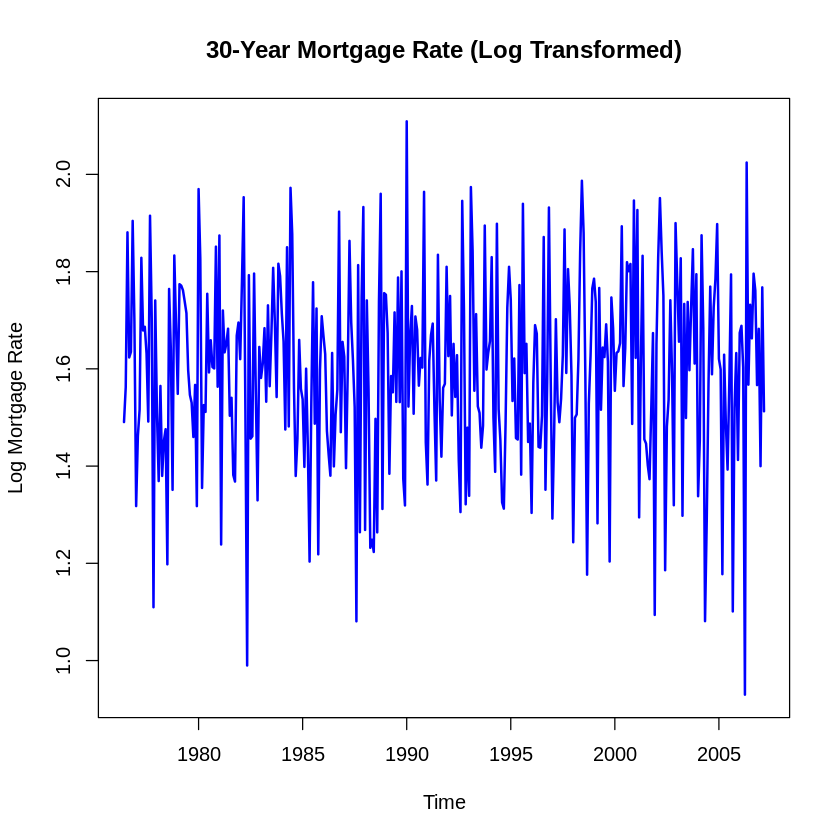


	Ljung-Box test

data:  Residuals from ARIMA(0,0,0)(0,0,1)[12] with non-zero mean
Q* = 16.399, df = 23, p-value = 0.8377

Model df: 1.   Total lags used: 24



Series: ts_data 
ARIMA(0,0,0)(0,0,1)[12] with non-zero mean 

Coefficients:
         sma1    mean
      -0.0979  1.5966
s.e.   0.0549  0.0092

sigma^2 = 0.03827:  log likelihood = 79.62
AIC=-153.25   AICc=-153.18   BIC=-141.51

Training set error measures:
                       ME      RMSE       MAE     MPE     MAPE      MASE
Training set 0.0001018772 0.1950906 0.1542357 -1.6347 10.13126 0.6711344
                    ACF1
Training set -0.02674969

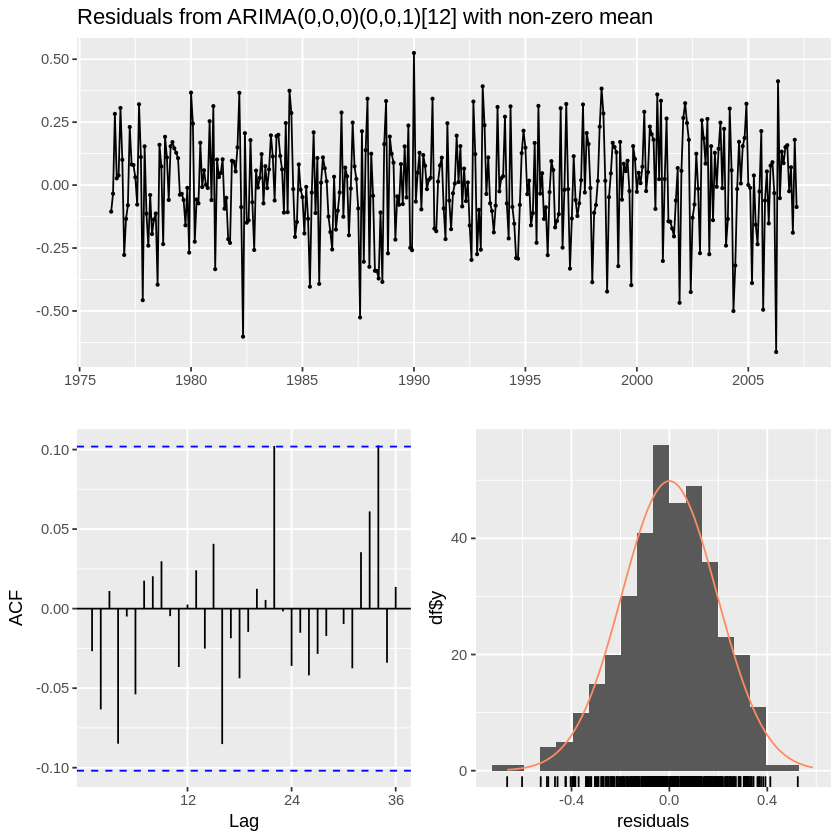

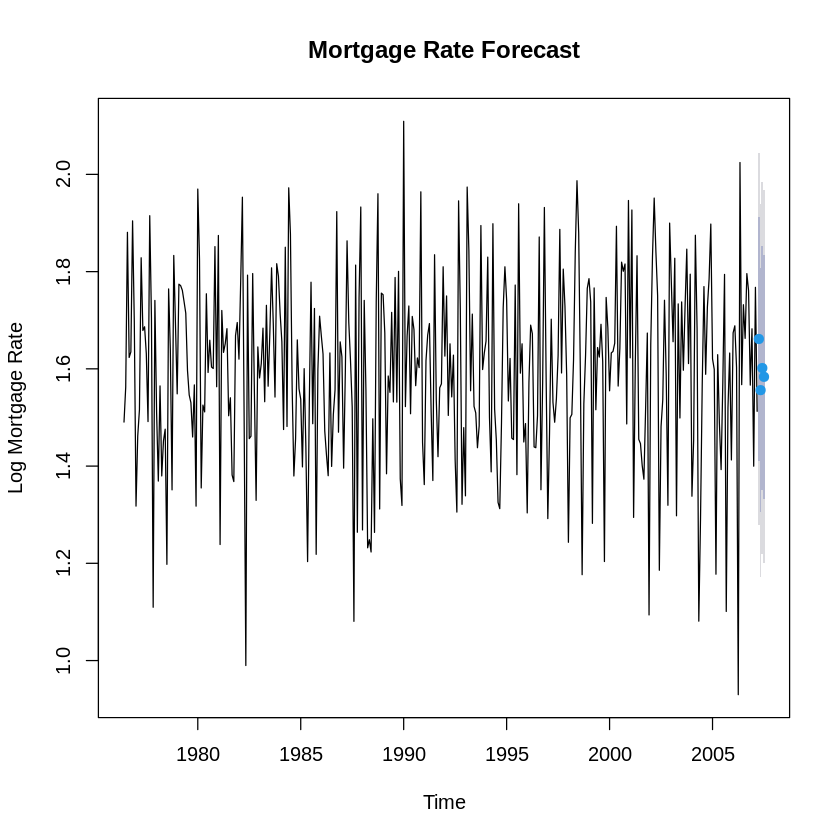

In [ ]:
library(forecast)
library(ggplot2)

In [ ]:
dec_data <- read.table("/content/m-dec1-8006.txt", header = FALSE)
mor_data <- read.table("/content/m-mortg.txt", header = FALSE)
q_data<- read.table("/content/q-aa-earn.txt", header = FALSE)

In [ ]:
#question1
mor = mor_data[,4]

ts_data <- ts(mor, start = c(1976, 06), frequency = 12)

png("mortgage rate.png", width = 800, height = 600)
plot(ts_data, main = "mortgage rate",
     xlab = "time", ylab = "mortgage rate", col = "blue", lwd = 2)
dev.off()

pdf 
  2

In [ ]:
mor = log(mor)

ts_data <- ts(mor, start = c(1976, 06), frequency = 12)

png("log mortgage rate.png", width = 800, height = 600)
plot(ts_data, main = "log mortgage rate",
     xlab = "time", ylab = "mortgage rate", col = "blue", lwd = 2)
dev.off()

pdf 
  2


	Ljung-Box test

data:  Residuals from ARIMA(2,1,1)
Q* = 4.4204, df = 7, p-value = 0.7303

Model df: 3.   Total lags used: 10



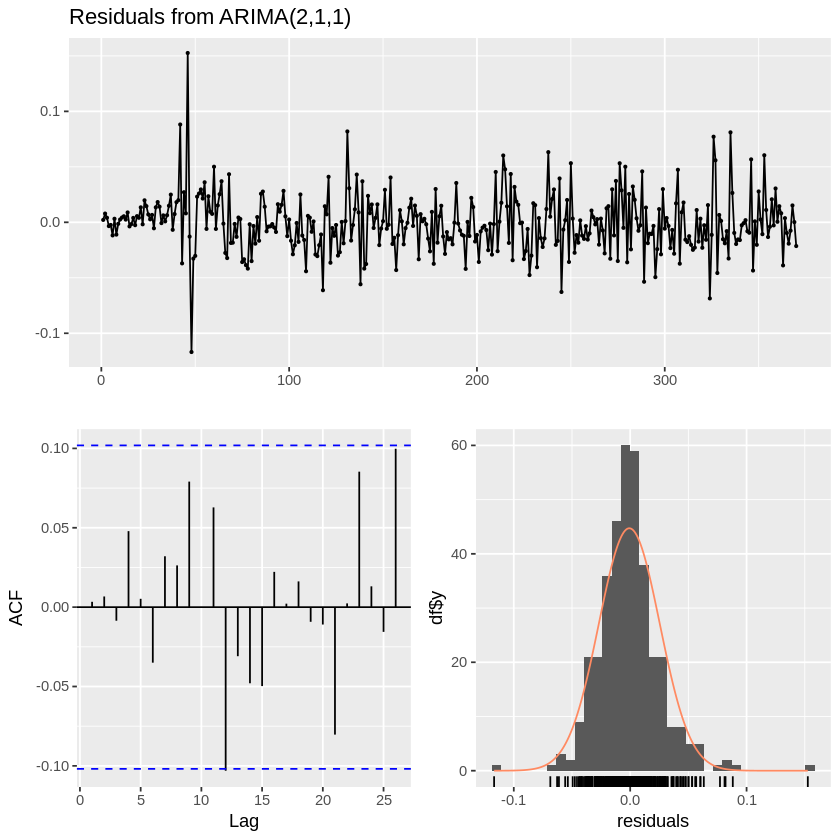

In [ ]:
model1 <- auto.arima(mor)
checkresiduals(model1)

Series: mor 
ARIMA(2,1,1) 

Coefficients:
         ar1      ar2     ma1
      0.3058  -0.2278  0.2206
s.e.  0.1372   0.0760  0.1375

sigma^2 = 0.000691:  log likelihood = 820.42
AIC=-1632.85   AICc=-1632.74   BIC=-1617.2

Training set error measures:
                        ME       RMSE        MAE        MPE      MAPE      MASE
Training set -0.0007541695 0.02614352 0.01885485 -0.0427874 0.8710824 0.8610424
                    ACF1
Training set 0.003371883

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
371       1.804420 1.770733 1.838107 1.752900 1.855939
372       1.805002 1.743530 1.866473 1.710989 1.899014
373       1.808291 1.729575 1.887007 1.687906 1.928676
374       1.809164 1.718771 1.899557 1.670920 1.947409


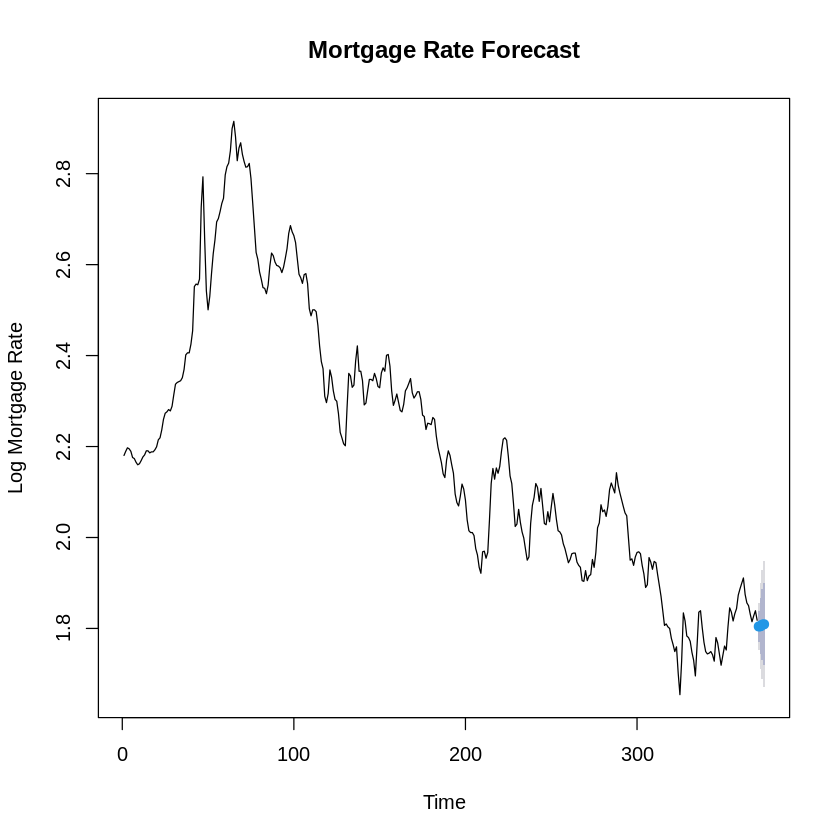

In [ ]:
summary(model1)

forecasts <- forecast(model1, h = 4)
print(forecasts)
plot(forecasts, main = "Mortgage Rate Forecast",
     xlab = "Time", ylab = "Log Mortgage Rate")

In [ ]:
library(tseries)
adf_result <- adf.test(mor)
print(adf_result)


	Augmented Dickey-Fuller Test

data:  mor
Dickey-Fuller = -3.219, Lag order = 7, p-value = 0.08492
alternative hypothesis: stationary



In [ ]:
d1mor = diff(mor)
adf_result <- adf.test(d1mor)
print(adf_result)

Warning message in adf.test(d1mor):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  d1mor
Dickey-Fuller = -6.2472, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary



In [ ]:
png("mortgageacf.png", width = 800, height = 600)
acf(d1mor)
dev.off()
png("mortgagepacf.png", width = 800, height = 600)
pacf(d1mor)
dev.off()

pdf 
  2

pdf 
  2

In [ ]:
model <- Arima(mor, order=c(2, 1, 1))
summary(model)

residuals <- residuals(model)

ljung_box_test <- Box.test(residuals, lag=12, type="Ljung-Box")

print(ljung_box_test)

Series: mor 
ARIMA(2,1,1) 

Coefficients:
         ar1      ar2     ma1
      0.3058  -0.2278  0.2206
s.e.  0.1372   0.0760  0.1375

sigma^2 = 0.000691:  log likelihood = 820.42
AIC=-1632.85   AICc=-1632.74   BIC=-1617.2

Training set error measures:
                        ME       RMSE        MAE        MPE      MAPE      MASE
Training set -0.0007541695 0.02614352 0.01885485 -0.0427874 0.8710824 0.8610424
                    ACF1
Training set 0.003371883


	Box-Ljung test

data:  residuals
X-squared = 10.017, df = 12, p-value = 0.6145



In [ ]:
forecasts <- forecast(model, h = 4)
print(forecasts)

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
371       1.804420 1.770733 1.838107 1.752900 1.855939
372       1.805002 1.743530 1.866473 1.710989 1.899014
373       1.808291 1.729575 1.887007 1.687906 1.928676
374       1.809164 1.718771 1.899557 1.670920 1.947409


In [ ]:
#question2
head(dec_data, 10)

,V1,V2
,<int>,<dbl>
1,19800131,0.18668
2,19800229,0.02908
3,19800331,-0.16778
4,19800430,0.00772
5,19800530,0.04802
6,19800630,0.02905
7,19800731,0.07572
8,19800829,0.07738
9,19800930,0.11412


In [ ]:
dec = dec_data[,2]

ts_data <- ts(dec, start = c(1980, 01), frequency = 12)

png("q2ts.png", width = 800, height = 600)
plot(ts_data, main = "Decile 1",
     xlab = "time", ylab = "simple return", col = "blue", lwd = 2)
dev.off()

pdf 
  2

In [ ]:
model <- Arima(dec, order=c(0,0,1), seasonal=list(order=c(1,0,1), period=12))

summary(model)

Series: dec 
ARIMA(0,0,1)(1,0,1)[12] with non-zero mean 

Coefficients:
         ma1    sar1     sma1    mean
      0.2409  0.9995  -0.9830  0.0179
s.e.  0.0517  0.0014   0.0241  0.0131

sigma^2 = 0.004141:  log likelihood = 420.42
AIC=-830.83   AICc=-830.64   BIC=-811.93

Training set error measures:
                       ME       RMSE        MAE      MPE     MAPE      MASE
Training set 2.832309e-05 0.06395179 0.04411324 82.78653 141.3601 0.7387383
                   ACF1
Training set 0.01055485

In [ ]:
residuals <- residuals(model)

ljung_box_test <- Box.test(residuals, lag=24, type="Ljung-Box")

print(ljung_box_test)


	Box-Ljung test

data:  residuals
X-squared = 23.922, df = 24, p-value = 0.466



In [ ]:
tail(q_data,10)

,V1,V2,V3,V4
,<int>,<int>,<int>,<dbl>
52,7,7,2004,0.46
53,7,10,2004,0.34
54,10,1,2005,0.39
55,6,4,2005,0.40
56,7,7,2005,0.46
57,10,10,2005,0.33
58,9,1,2006,0.35
59,10,4,2006,0.70
60,10,7,2006,0.90


In [ ]:
q = q_data[,4]

ts_data <- ts(q, start = c(1991, 4), frequency = 4)

png("q3ts.png", width = 800, height = 600)
plot(ts_data, main = "Alcoa stock",
     xlab = "time", ylab = "quarterly earnings", col = "blue", lwd = 2)
dev.off()

pdf 
  2

In [ ]:
model <- Arima(ts_data, order=c(1,1,1), seasonal=list(order=c(1,0,1), period=12))

residuals <- residuals(model)

ljung_box_test <- Box.test(residuals, lag=12, type="Ljung-Box")

print(ljung_box_test)


	Box-Ljung test

data:  residuals
X-squared = 7.218, df = 12, p-value = 0.8429



In [ ]:
forecasts <- forecast(model, h = 4)
print(forecasts)

        Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
2007 Q1      0.6234833 0.4767012 0.7702655 0.3989994 0.8479673
2007 Q2      0.6674834 0.4953979 0.8395689 0.4043014 0.9306654
2007 Q3      0.6871332 0.4992575 0.8750090 0.3998021 0.9744644
2007 Q4      0.6585307 0.4574252 0.8596361 0.3509664 0.9660949


In [ ]:
df = diff(ts_data)
adf_test <- adf.test(df)
print(adf_test)

if (adf_test$p.value < 0.05) {
  cat("序列是平稳的（拒绝原假设）\n")
} else {
  cat("序列是非平稳的（不能拒绝原假设）\n")
}

seasonal_diff_data <- diff(ts_data, lag = 4)

adf_test_seasonal <- adf.test(seasonal_diff_data)
print(adf_test_seasonal)


	Augmented Dickey-Fuller Test

data:  df
Dickey-Fuller = -3.5154, Lag order = 3, p-value = 0.04794
alternative hypothesis: stationary

序列是平稳的（拒绝原假设）

	Augmented Dickey-Fuller Test

data:  seasonal_diff_data
Dickey-Fuller = -2.9971, Lag order = 3, p-value = 0.1724
alternative hypothesis: stationary



Series: ts_data 
ARIMA(1,1,1)(1,0,0)[4] 

Coefficients:
         ar1      ma1    sar1
      0.6777  -0.9459  0.7005
s.e.  0.1245   0.0589  0.1536

sigma^2 = 0.01079:  log likelihood = 51.17
AIC=-94.34   AICc=-93.61   BIC=-85.96

Training set error measures:
                    ME      RMSE        MAE       MPE     MAPE      MASE
Training set 0.0155788 0.1004302 0.06637743 -5.580438 40.13196 0.6720273
                   ACF1
Training set 0.03198065


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)(1,0,0)[4]
Q* = 5.6934, df = 5, p-value = 0.3372

Model df: 3.   Total lags used: 8



Series: ts_data 
ARIMA(1,1,1)(1,0,0)[4] 

Coefficients:
         ar1      ma1    sar1
      0.6777  -0.9459  0.7005
s.e.  0.1245   0.0589  0.1536

sigma^2 = 0.01079:  log likelihood = 51.17
AIC=-94.34   AICc=-93.61   BIC=-85.96

Training set error measures:
                    ME      RMSE        MAE       MPE     MAPE      MASE
Training set 0.0155788 0.1004302 0.06637743 -5.580438 40.13196 0.6720273
                   ACF1
Training set 0.03198065

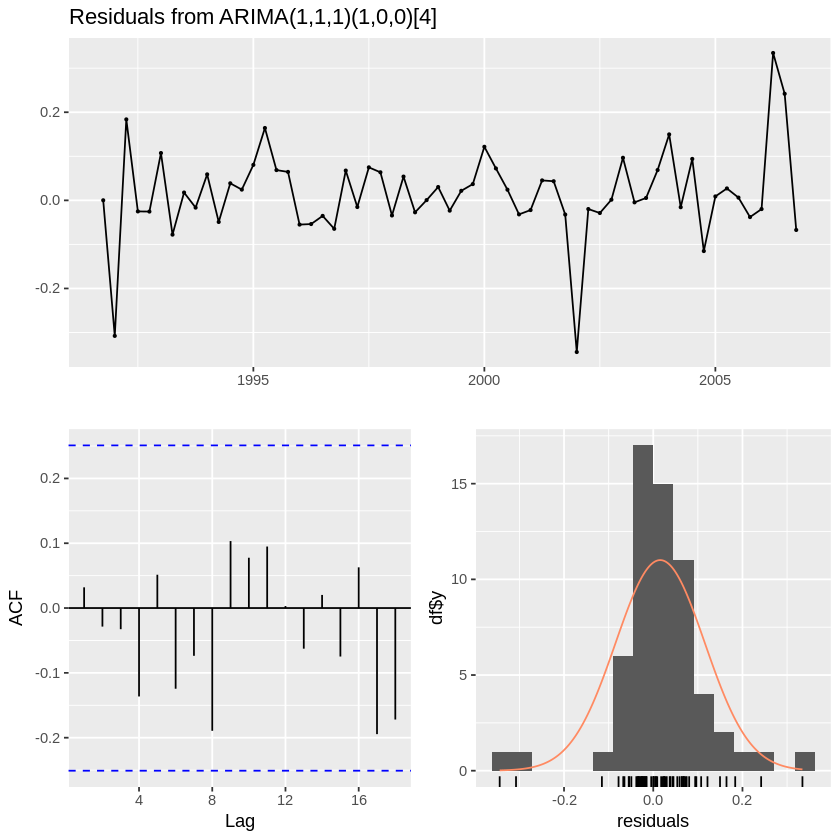

In [ ]:
fit <- auto.arima(ts_data)
summary(fit)

checkresiduals(fit)

summary(fit)

forecasts <- forecast(fit, h = 4)

In [ ]:
residuals <- residuals(model)

ljung_box_test <- Box.test(residuals, lag=12, type="Ljung-Box")

print(ljung_box_test)


	Box-Ljung test

data:  residuals
X-squared = 9.1439, df = 12, p-value = 0.6906



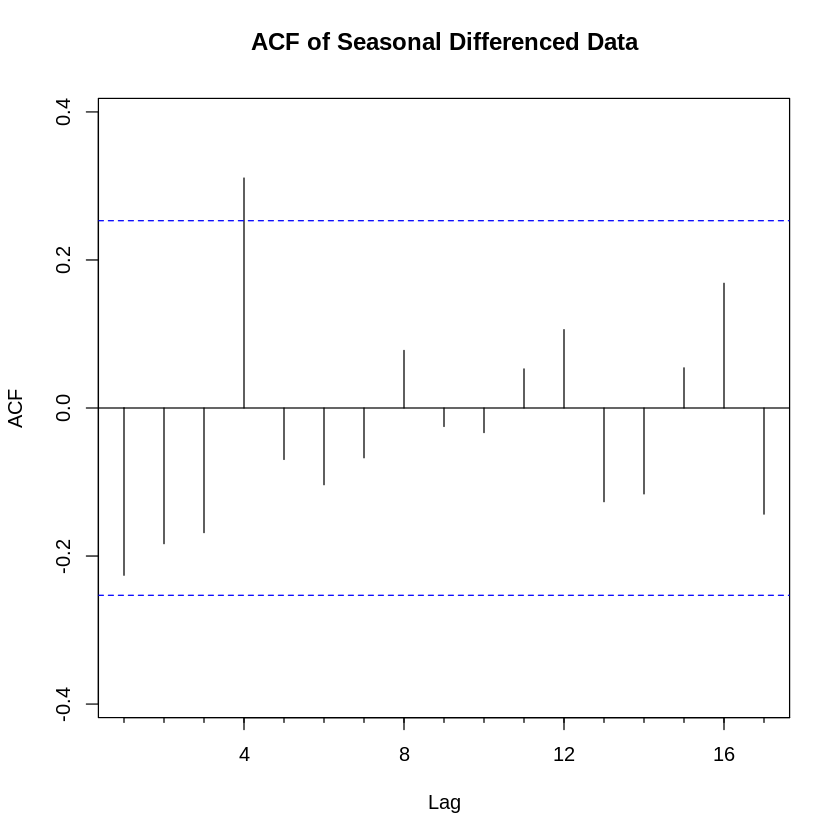

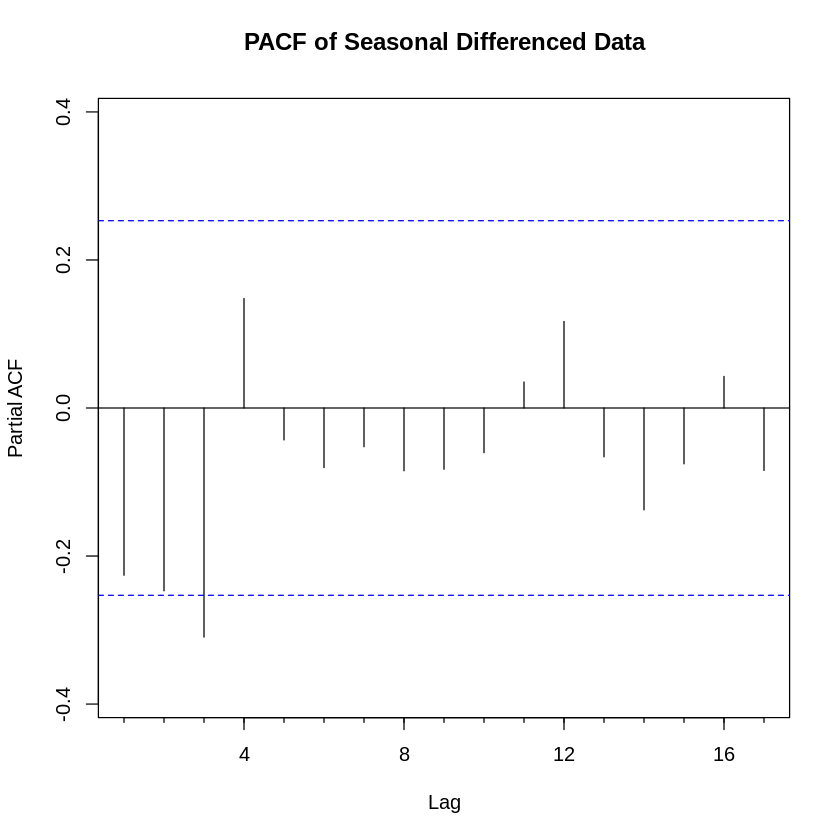

Series: q 
ARIMA(1,0,1)(1,0,0)[4] with non-zero mean 

Coefficients:
         ar1     ma1    sar1    mean
      0.6575  0.1175  0.7181  0.3173
s.e.  0.1409  0.1823  0.1316  0.1264

sigma^2 = 0.01068:  log likelihood = 52.02
AIC=-94.03   AICc=-92.94   BIC=-83.48

Training set error measures:
                      ME       RMSE        MAE       MPE     MAPE      MASE
Training set 0.006340615 0.09988294 0.06682152 -15.25581 43.82883 0.8622132
                  ACF1
Training set 0.0276659

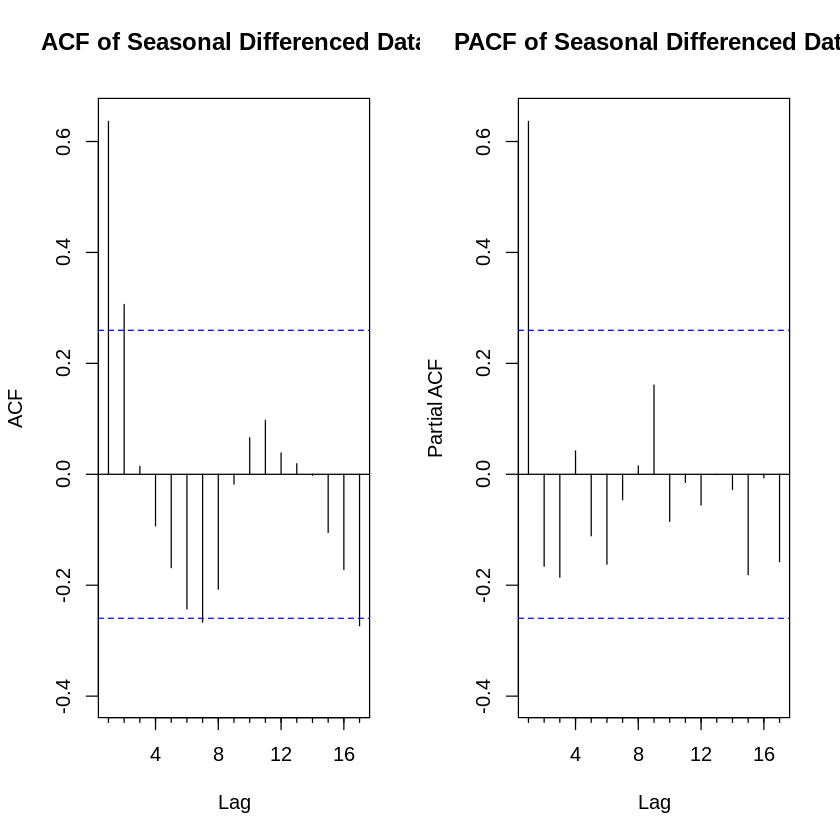


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1)(1,0,0)[4] with non-zero mean
Q* = 6.0828, df = 7, p-value = 0.5301

Model df: 3.   Total lags used: 10



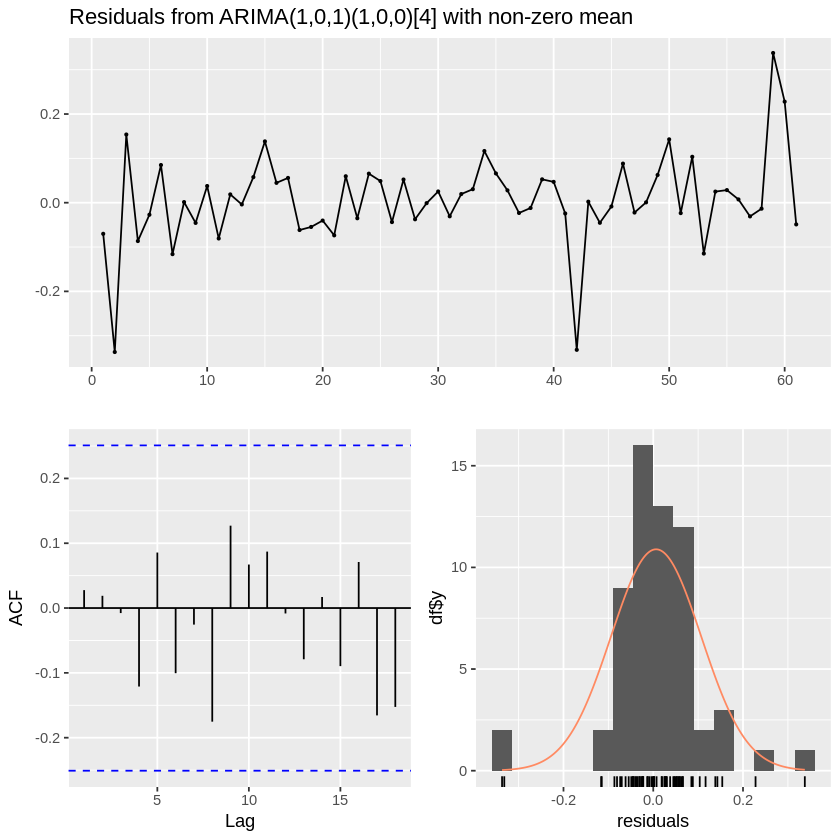

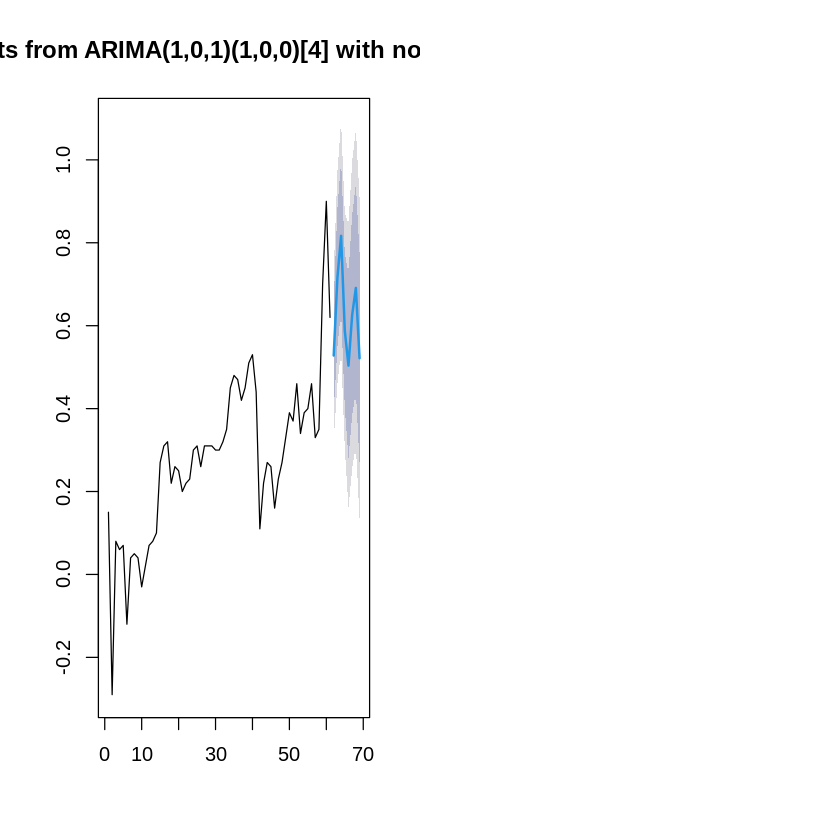

In [ ]:
Acf(df, main = "ACF of Seasonal Differenced Data")
Pacf(df, main = "PACF of Seasonal Differenced Data")

par(mfrow = c(1, 2))
Acf(seasonal_diff_data, main = "ACF of Seasonal Differenced Data")
Pacf(seasonal_diff_data, main = "PACF of Seasonal Differenced Data")
fit <- Arima(q, order = c(1, 0, 1), seasonal = list(order = c(1, 0, 0), period = 4))
summary(fit)
checkresiduals(fit)

forecasted_values <- forecast(fit, h = 8)
plot(forecasted_values)

In [ ]:
residuals <- residuals(fit)

ljung_box_test <- Box.test(residuals, lag=12, type="Ljung-Box")

print(ljung_box_test)


	Box-Ljung test

data:  residuals
X-squared = 6.6711, df = 12, p-value = 0.8786

